In [ ]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text1 = '''I have bought several of the Vitality canned dog food products and have found them all to be of good quality. 
           The product looks more like a, "stew" than a processed meat and it smells better. 
           My Labrador is finicky and she appreciates this product better than  most.'''

text2 = '''Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. 
           Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'''

In [ ]:
from nltk.corpus import stopwords

s = stopwords.words("english")



# no of total words, distinct words, lexical diversity and all words having length greater than 5.

In [ ]:
from nltk.tokenize import sent_tokenize,word_tokenize
import re

def word_ex(text):
  words = []
  for line in sent_tokenize(text):
    line = re.sub(r'[^\w\s]','',line)
    for word in word_tokenize(line):
      word = word.lower()
      words.append(word)
  
  return words



words1 = word_ex(text1)
words2 = word_ex(text2)

distinct_words1 = set(words1)

distinct_words2 = set(words2)

print("Total Words in both Texts: {0}".format(len(words1)+len(words2)))

print("Distinct words:\n",*distinct_words1," ",*distinct_words2)

total = (len(words1)+len(words2))/(len(set(words1))+len(set(words2)))
print("\nLexical Diersity of words in both text together: {0}".format(total))

total_words_u = set(words1+words2)
print("Distinct Words Count: {0}".format(len(total_words_u)))
print("\nWords with length greater than 5\n")
for words in total_words_u:
  if len(words)>5:
    print(words)


Total Words in both Texts: 79
Distinct words:
 product quality looks bought be it food all than processed like labrador i the smells meat more she of stew is good this vitality dog to products most several them and my have better finicky a canned found appreciates   product if peanuts as sized salted unsalted was or vendor were not jumbo error the this small to intended peanutsthe represent labeled actually arrived sure an

Lexical Diersity of words in both text together: 1.2153846153846153
Distinct Words Count: 61

Words with length greater than 5

product
quality
peanuts
bought
salted
unsalted
vendor
processed
labrador
smells
vitality
products
intended
peanutsthe
represent
several
labeled
actually
better
finicky
arrived
canned
appreciates


# WordCloud

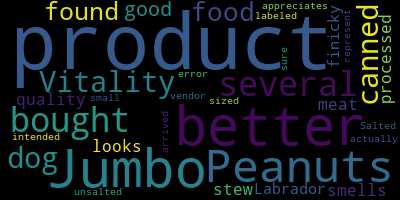

In [ ]:
import wordcloud

wc = wordcloud.WordCloud()

wc.generate(text1+text2)
wc.to_image()

# implement wor2vec model, generate the wordvectors (without pre-processing steps)

In [ ]:
import gensim
from gensim.models import Word2Vec

In [ ]:
def word_ex(text):
  words = []
  for line in sent_tokenize(text):
    line = re.sub(r'[^\w\s]','',line)
    w = []
    for word in word_tokenize(line):
      w.append(word)
    words.append(w)
  
  return words

t = word_ex(text1)+word_ex(text2)
print(t)

[['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality'], ['The', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better'], ['My', 'Labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most'], ['Product', 'arrived', 'labeled', 'as', 'Jumbo', 'Salted', 'Peanutsthe', 'peanuts', 'were', 'actually', 'small', 'sized', 'unsalted'], ['Not', 'sure', 'if', 'this', 'was', 'an', 'error', 'or', 'if', 'the', 'vendor', 'intended', 'to', 'represent', 'the', 'product', 'as', 'Jumbo']]


In [ ]:
model = Word2Vec(t,min_count=1,size = 50,sg = 1, window = 5)

In [ ]:
print(model.wv.vocab)

{'I': <gensim.models.keyedvectors.Vocab object at 0x7fec2dd24150>, 'have': <gensim.models.keyedvectors.Vocab object at 0x7fec3065bf50>, 'bought': <gensim.models.keyedvectors.Vocab object at 0x7fec30666e90>, 'several': <gensim.models.keyedvectors.Vocab object at 0x7fec30666850>, 'of': <gensim.models.keyedvectors.Vocab object at 0x7fec2dd71b50>, 'the': <gensim.models.keyedvectors.Vocab object at 0x7fec3062a910>, 'Vitality': <gensim.models.keyedvectors.Vocab object at 0x7fec2ddfd3d0>, 'canned': <gensim.models.keyedvectors.Vocab object at 0x7fec2ddfda90>, 'dog': <gensim.models.keyedvectors.Vocab object at 0x7fec30666ad0>, 'food': <gensim.models.keyedvectors.Vocab object at 0x7fec39861f90>, 'products': <gensim.models.keyedvectors.Vocab object at 0x7fec2ddfda10>, 'and': <gensim.models.keyedvectors.Vocab object at 0x7fec2dd0b990>, 'found': <gensim.models.keyedvectors.Vocab object at 0x7fec2dd0bbd0>, 'them': <gensim.models.keyedvectors.Vocab object at 0x7fec2dd0b590>, 'all': <gensim.models.key

In [ ]:
print(model.most_similar("peanuts"))

[('appreciates', 0.31631433963775635), ('smells', 0.24875757098197937), ('an', 0.1934325397014618), ('meat', 0.1873660534620285), ('Product', 0.18153256177902222), ('processed', 0.17638158798217773), ('like', 0.14541009068489075), ('good', 0.13914811611175537), ('intended', 0.13855400681495667), ('than', 0.1324600875377655)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
model.save("w2c.model")